In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

oil = pd.read_csv("data/oil.csv")
hol = pd.read_csv("data/holidays_events.csv")
sto = pd.read_csv("data/stores.csv")
tra = pd.read_csv("data/transactions.csv")

train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [2]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [3]:
# merge all datasets to do EDA
m1 = pd.merge(hol, oil)
m2 = pd.merge(train, sto)
m3 = pd.merge(m2, tra)
df = pd.merge(m3, m1, on = "date")

In [9]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,transactions,type_y,locale,locale_name,description,transferred,dcoilwtico
0,73062,2013-02-11,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
1,73063,2013-02-11,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
2,73064,2013-02-11,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
3,73065,2013-02-11,1,BEVERAGES,172.0,0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
4,73066,2013-02-11,1,BOOKS,0.0,0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01


In [4]:
df.describe()

,id,store_nbr,sales,onpromotion,cluster,transactions,dcoilwtico
count,3.220470e+05,322047.000000,322047.000000,322047.000000,322047.000000,322047.000000,300003.000000
mean,1.682979e+06,26.994672,406.383452,3.727136,8.531202,1734.117840,64.077912
std,7.862493e+05,15.595174,1246.881240,15.512095,4.713809,1050.335018,25.147682
min,5.610000e+02,1.000000,0.000000,0.000000,1.000000,54.000000,27.960000
25%,1.010616e+06,13.000000,1.000000,0.000000,4.000000,1030.000000,44.660000
50%,1.842406e+06,27.000000,19.000000,0.000000,9.000000,1409.000000,51.440000
75%,2.209556e+06,40.000000,241.260505,1.000000,13.000000,2148.000000,94.740000
max,3.000887e+06,54.000000,124717.000000,716.000000,17.000000,8359.000000,107.950000


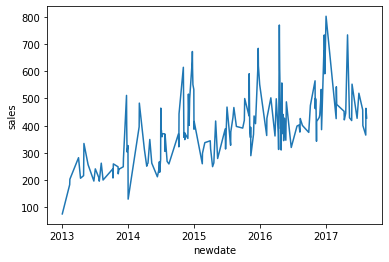

In [11]:
df['newdate'] = pd.to_datetime(df['date'], format="%Y-%m-%d", errors="coerce")
sns.lineplot(x="newdate", y="sales", data=df, ci=None, estimator="mean")
plt.show()

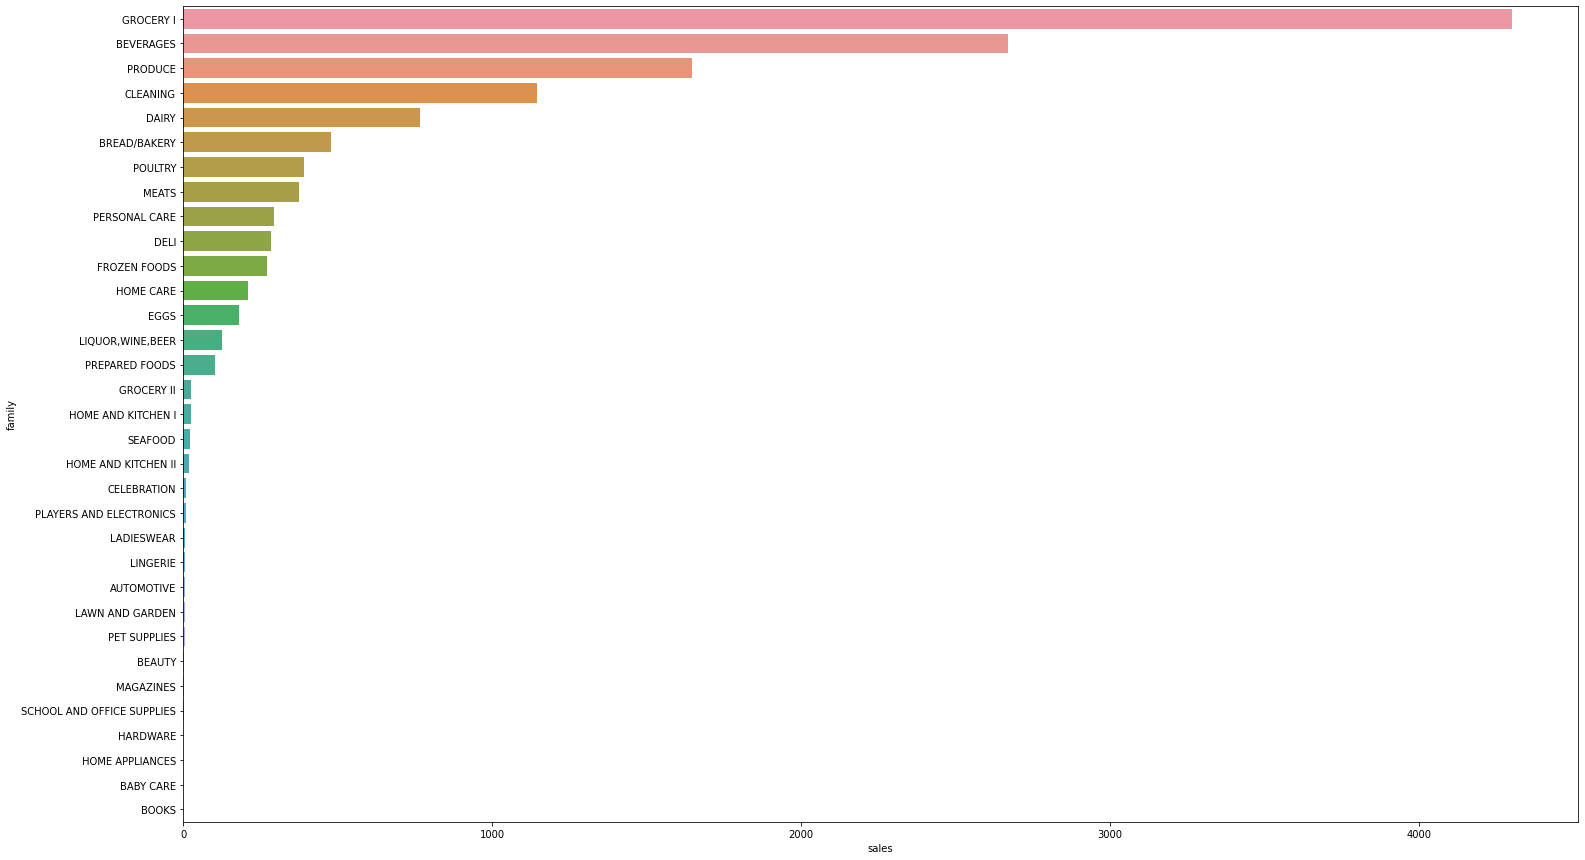

In [12]:
d = df.groupby("family")["sales"].mean().sort_values(ascending=False)
d = pd.DataFrame(d)
df.sales = pd.to_numeric(df.sales, errors="coerce")
ax, f = plt.subplots(figsize=(25, 15))
sns.barplot(x="sales", y=d.index, data=d, ax=None, ci=None)
plt.show()

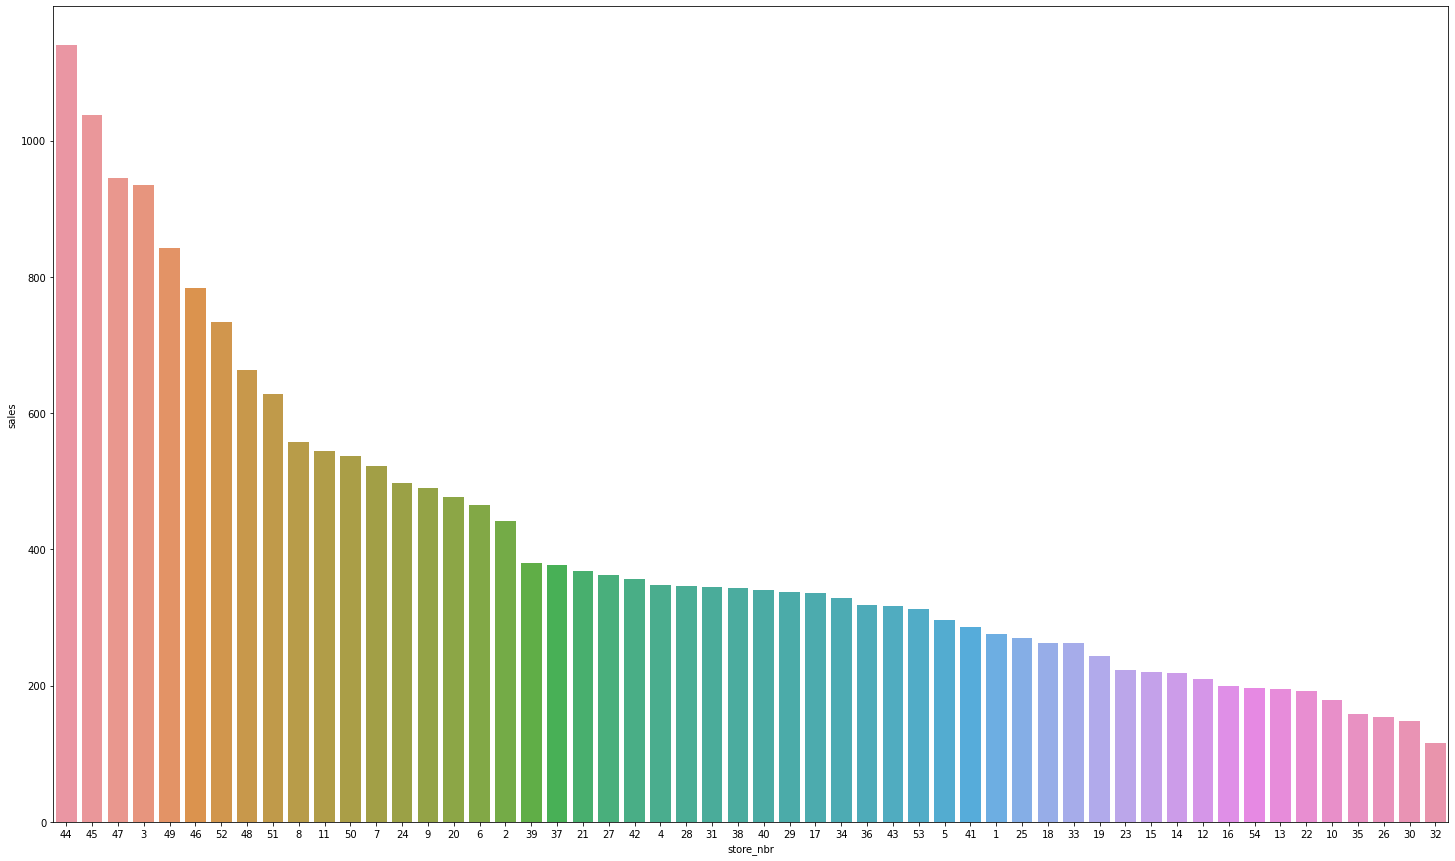

In [25]:
s = df.groupby("store_nbr")["sales"].mean().sort_values(ascending=False)
s = pd.DataFrame(s)
ax, f = plt.subplots(figsize=(25, 15))
sns.barplot(x = s.index, y = "sales", data = s, ax = None, ci = None, order = s.index)
plt.show()

In [35]:
features = df.drop(["sales", "newdate", "date"], axis=1)
features = pd.get_dummies(features)
features.head()

,id,store_nbr,onpromotion,cluster,transactions,transferred,dcoilwtico,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,...,description_Terremoto Manabi+30,description_Terremoto Manabi+4,description_Terremoto Manabi+5,description_Terremoto Manabi+6,description_Terremoto Manabi+9,description_Traslado Batalla de Pichincha,description_Traslado Independencia de Guayaquil,description_Traslado Primer Grito de Independencia,description_Traslado Primer dia del ano,description_Viernes Santo
0,73062,1,0,13,396,False,97.01,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,73063,1,0,13,396,False,97.01,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,73064,1,0,13,396,False,97.01,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,73065,1,0,13,396,False,97.01,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,73066,1,0,13,396,False,97.01,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
labels = df["sales"]
labels.head()

0      0.0
1      0.0
2      0.0
3    172.0
4      0.0
Name: sales, dtype: float64

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size=0.33)

In [39]:
from xgboost import XGBRegressor

# train the model
model = XGBRegressor(n_estimators=10, max_depth=20, verbosity=2)
model.fit(X_train, y_train)

# extract the training set predictions
model.predict(X_train)
# array([7.0887003, 3.7923286, 7.0887003], dtype=float32)

# extract the test set predictions
model.predict(X_test)
# array([7.0887003, 7.0887003], dtype=float32)

[04:36:02] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4038 extra nodes, 0 pruned nodes, max_depth=20
[04:36:03] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 5442 extra nodes, 0 pruned nodes, max_depth=20
[04:36:03] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 7606 extra nodes, 0 pruned nodes, max_depth=20
[04:36:04] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 9532 extra nodes, 0 pruned nodes, max_depth=20
[04:36:05] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 10866 extra nodes, 0 pruned nodes, max_depth=20
[04:36:05] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 11660 extra nodes, 0 pruned nodes, max_depth=20
[04:36:06] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 11834 ext

array([733.1708   , 225.31784  , 266.639    , ..., 386.22598  ,
       874.90393  ,   6.5498405], dtype=float32)

In [40]:
model.score(X_test, y_test)

0.8006609280237688